# # Task 1: Data Exploration and Enrichment
# 
# ## Objective
# 1. Understand the starter dataset
# 2. Enrich it with additional data for forecasting
# 3. Document all additions

 # 1. Setup and Import

In [1]:
import sys
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Get project root (one level above notebooks)
PROJECT_ROOT = Path.cwd().parent

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')

# Add project root to Python path
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print("Project root:", PROJECT_ROOT)
print("Python path fixed!")


Project root: d:\10acadamyWeek10 project\ethiopia-financial-inclusion-forecast
Python path fixed!


# 2. Load and Explore Original Data

In [3]:
data_path = Path.cwd().parent / "data" / "raw" / "ethiopia_fi_unified_data.xlsx"

# Load both sheets
df_main = pd.read_excel(data_path, sheet_name="ethiopia_fi_unified_data")
df_impact = pd.read_excel(data_path, sheet_name="Impact_sheet")

print("=== Original Dataset Summary ===")
print(f"Main sheet shape: {df_main.shape}")
print(f"Impact sheet shape: {df_impact.shape}")
print("\nRecord types in main sheet:")
print(df_main['record_type'].value_counts())

=== Original Dataset Summary ===
Main sheet shape: (43, 34)
Impact sheet shape: (14, 35)

Record types in main sheet:
record_type
observation    30
event          10
target          3
Name: count, dtype: int64


# 3. Create Data Enricher Instance

In [4]:
from src.data.enricher import DataEnricher

# Create enricher
enricher = DataEnricher()
print("DataEnricher created successfully!")


DataEnricher created successfully!


# 4. Add New Observations (Annual Data from IMF FAS)
 ### Add annual account ownership data (filling gaps between Findex years)
### These numbers are from IMF FAS (converted from per 1000 adults to %)

In [5]:
print("\n=== Adding New Observations ===\n")

# 2015 Account Ownership
obs1 = enricher.add_observation(
    pillar="ACCESS",
    indicator="Account Ownership Rate",
    indicator_code="ACC_OWNERSHIP",
    value_numeric=28.5,  # 285 per 1000 adults = 28.5%
    observation_date="2015-12-31",
    source_name="IMF Financial Access Survey",
    source_url="https://data.imf.org/FAS",
    confidence="high",
    original_text="Ethiopia: 285 accounts per 1,000 adults in 2015",
    notes="Fills gap between 2014 (22%) and 2017 (35%)",
    collected_by="Your Name"
)

# 2016 Account Ownership
obs2 = enricher.add_observation(
    pillar="ACCESS",
    indicator="Account Ownership Rate",
    indicator_code="ACC_OWNERSHIP",
    value_numeric=32.0,
    observation_date="2016-12-31",
    source_name="IMF Financial Access Survey",
    source_url="https://data.imf.org/FAS",
    confidence="high",
    original_text="Ethiopia: 320 accounts per 1,000 adults in 2016",
    notes="Annual trend data",
    collected_by="Your Name"
)

# 2018 Account Ownership
obs3 = enricher.add_observation(
    pillar="ACCESS",
    indicator="Account Ownership Rate",
    indicator_code="ACC_OWNERSHIP",
    value_numeric=39.0,
    observation_date="2018-12-31",
    source_name="IMF Financial Access Survey",
    source_url="https://data.imf.org/FAS",
    confidence="high",
    original_text="Ethiopia: 390 accounts per 1,000 adults in 2018",
    notes="Fills gap between 2017 (35%) and 2021 (46%)",
    collected_by="Your Name"
)

# 2019 Account Ownership
obs4 = enricher.add_observation(
    pillar="ACCESS",
    indicator="Account Ownership Rate",
    indicator_code="ACC_OWNERSHIP",
    value_numeric=41.0,
    observation_date="2019-12-31",
    source_name="IMF Financial Access Survey",
    source_url="https://data.imf.org/FAS",
    confidence="high",
    original_text="Ethiopia: 410 accounts per 1,000 adults in 2019",
    notes="Annual trend data",
    collected_by="Your Name"
)

# 2020 Account Ownership
obs5 = enricher.add_observation(
    pillar="ACCESS",
    indicator="Account Ownership Rate",
    indicator_code="ACC_OWNERSHIP",
    value_numeric=43.5,
    observation_date="2020-12-31",
    source_name="IMF Financial Access Survey",
    source_url="https://data.imf.org/FAS",
    confidence="high",
    original_text="Ethiopia: 435 accounts per 1,000 adults in 2020",
    notes="Fills gap between 2017 (35%) and 2021 (46%)",
    collected_by="Your Name"
)

# 2022 Account Ownership
obs6 = enricher.add_observation(
    pillar="ACCESS",
    indicator="Account Ownership Rate",
    indicator_code="ACC_OWNERSHIP",
    value_numeric=47.0,
    observation_date="2022-12-31",
    source_name="IMF Financial Access Survey",
    source_url="https://data.imf.org/FAS",
    confidence="high",
    original_text="Ethiopia: 470 accounts per 1,000 adults in 2022",
    notes="Fills gap between 2021 (46%) and 2024 (49%)",
    collected_by="Your Name"
)

# 2023 Account Ownership (latest)
obs7 = enricher.add_observation(
    pillar="ACCESS",
    indicator="Account Ownership Rate",
    indicator_code="ACC_OWNERSHIP",
    value_numeric=48.0,
    observation_date="2023-12-31",
    source_name="IMF Financial Access Survey",
    source_url="https://data.imf.org/FAS",
    confidence="high",
    original_text="Ethiopia: 480 accounts per 1,000 adults in 2023",
    notes="Latest available data before 2024 survey",
    collected_by="Your Name"
)



=== Adding New Observations ===

[INFO] ✓ Added observation: ACC_OWNERSHIP = 28.5 on 2015-12-31
[INFO] ✓ Added observation: ACC_OWNERSHIP = 32.0 on 2016-12-31
[INFO] ✓ Added observation: ACC_OWNERSHIP = 39.0 on 2018-12-31
[INFO] ✓ Added observation: ACC_OWNERSHIP = 41.0 on 2019-12-31
[INFO] ✓ Added observation: ACC_OWNERSHIP = 43.5 on 2020-12-31
[INFO] ✓ Added observation: ACC_OWNERSHIP = 47.0 on 2022-12-31
[INFO] ✓ Added observation: ACC_OWNERSHIP = 48.0 on 2023-12-31


# 5. Add Mobile Money Observations

In [6]:
# Add mobile money account data
print("\n=== Adding Mobile Money Data ===\n")

# 2018 Mobile Money
obs8 = enricher.add_observation(
    pillar="ACCESS",
    indicator="Mobile Money Account Rate",
    indicator_code="ACC_MM_ACCOUNT",
    value_numeric=5.8,
    observation_date="2018-12-31",
    source_name="IMF Financial Access Survey",
    source_url="https://data.imf.org/FAS",
    confidence="high",
    original_text="Ethiopia: 58 mobile money accounts per 1,000 adults in 2018",
    notes="Annual mobile money trend",
    collected_by="Your Name"
)

# 2019 Mobile Money
obs9 = enricher.add_observation(
    pillar="ACCESS",
    indicator="Mobile Money Account Rate",
    indicator_code="ACC_MM_ACCOUNT",
    value_numeric=6.8,
    observation_date="2019-12-31",
    source_name="IMF Financial Access Survey",
    source_url="https://data.imf.org/FAS",
    confidence="high",
    original_text="Ethiopia: 68 mobile money accounts per 1,000 adults in 2019",
    notes="Annual mobile money trend",
    collected_by="Your Name"
)

# 2020 Mobile Money
obs10 = enricher.add_observation(
    pillar="ACCESS",
    indicator="Mobile Money Account Rate",
    indicator_code="ACC_MM_ACCOUNT",
    value_numeric=7.5,
    observation_date="2020-12-31",
    source_name="IMF Financial Access Survey",
    source_url="https://data.imf.org/FAS",
    confidence="high",
    original_text="Ethiopia: 75 mobile money accounts per 1,000 adults in 2020",
    notes="Annual mobile money trend",
    collected_by="Your Name"
)

# 2022 Mobile Money
obs11 = enricher.add_observation(
    pillar="ACCESS",
    indicator="Mobile Money Account Rate",
    indicator_code="ACC_MM_ACCOUNT",
    value_numeric=11.0,
    observation_date="2022-12-31",
    source_name="IMF Financial Access Survey",
    source_url="https://data.imf.org/FAS",
    confidence="high",
    original_text="Ethiopia: 110 mobile money accounts per 1,000 adults in 2022",
    notes="Shows rapid growth after Telebirr launch",
    collected_by="Your Name"
)

# 2023 Mobile Money
obs12 = enricher.add_observation(
    pillar="ACCESS",
    indicator="Mobile Money Account Rate",
    indicator_code="ACC_MM_ACCOUNT",
    value_numeric=12.5,
    observation_date="2023-12-31",
    source_name="IMF Financial Access Survey",
    source_url="https://data.imf.org/FAS",
    confidence="high",
    original_text="Ethiopia: 125 mobile money accounts per 1,000 adults in 2023",
    notes="Continuing growth trend",
    collected_by="Your Name"
)


=== Adding Mobile Money Data ===

[INFO] ✓ Added observation: ACC_MM_ACCOUNT = 5.8 on 2018-12-31
[INFO] ✓ Added observation: ACC_MM_ACCOUNT = 6.8 on 2019-12-31
[INFO] ✓ Added observation: ACC_MM_ACCOUNT = 7.5 on 2020-12-31
[INFO] ✓ Added observation: ACC_MM_ACCOUNT = 11.0 on 2022-12-31
[INFO] ✓ Added observation: ACC_MM_ACCOUNT = 12.5 on 2023-12-31


# 6. Add Infrastructure/Observation Data

In [7]:
# Add smartphone penetration (from ITU/GSMA)
print("\n=== Adding Infrastructure Data ===\n")

# Smartphone penetration 2023
obs13 = enricher.add_observation(
    pillar="ACCESS",
    indicator="Smartphone Penetration Rate",
    indicator_code="ACC_SMARTPHONE",
    value_numeric=45.0,
    observation_date="2023-12-31",
    source_name="GSMA Mobile Economy Report 2024",
    source_url="https://www.gsma.com/mobileeconomy/",
    confidence="medium",
    original_text="Ethiopia smartphone penetration reached 45% in 2023",
    notes="Important enabler for digital financial services",
    collected_by="Your Name"
)

# Agent network density 2023
obs14 = enricher.add_observation(
    pillar="ACCESS",
    indicator="Agent Network Density",
    indicator_code="ACC_AGENT_DENSITY",
    value_numeric=8.5,
    observation_date="2023-12-31",
    source_name="GSMA State of the Industry Report",
    source_url="https://www.gsma.com/sotir/",
    confidence="medium",
    original_text="Ethiopia: 8.5 agents per 10,000 adults in 2023",
    notes="Agent network is critical for cash-in/cash-out services",
    collected_by="Your Name"
)

# Data affordability 2023
obs15 = enricher.add_observation(
    pillar="AFFORDABILITY",
    indicator="Data Affordability Index",
    indicator_code="AFF_DATA_INCOME",
    value_numeric=2.5,
    observation_date="2023-12-31",
    source_name="Alliance for Affordable Internet",
    source_url="https://a4ai.org/",
    confidence="medium",
    original_text="Ethiopia: 2.5% of average monthly income for 2GB data in 2023",
    notes="Lower is better - still above UN target of 2%",
    collected_by="Your Name"
)


=== Adding Infrastructure Data ===

[INFO] ✓ Added observation: ACC_SMARTPHONE = 45.0 on 2023-12-31
[INFO] ✓ Added observation: ACC_AGENT_DENSITY = 8.5 on 2023-12-31
[INFO] ✓ Added observation: AFF_DATA_INCOME = 2.5 on 2023-12-31


# 7. Add New Events

In [8]:
print("\n=== Adding New Events ===\n")

# COVID-19 pandemic event
event1 = enricher.add_event(
    category="economic",
    event_date="2020-03-13",
    source_name="World Health Organization",
    source_url="https://www.who.int/ethiopia/news/detail/13-03-2020-covid-19-confirmed-in-ethiopia",
    description="COVID-19 Pandemic Declared in Ethiopia",
    confidence="high",
    original_text="First COVID-19 case confirmed in Ethiopia on March 13, 2020",
    notes="Major economic and behavioral shock affecting financial inclusion",
    collected_by="Your Name"
)

# Get the event ID for impact links
covid_event_id = event1["record_id"]

# Digital payment fee waiver event
event2 = enricher.add_event(
    category="policy",
    event_date="2020-05-01",
    source_name="National Bank of Ethiopia",
    source_url="https://nbe.gov.et/",
    description="Mobile Money Transaction Fee Waivers During COVID",
    confidence="high",
    original_text="NBE encouraged banks and mobile money operators to waive fees to promote digital payments",
    notes="Policy response to COVID-19 to encourage digital payments",
    collected_by="Your Name"
)

fee_waiver_event_id = event2["record_id"]

# 4G Network Expansion event
event3 = enricher.add_event(
    category="infrastructure",
    event_date="2023-06-30",
    source_name="Ethio Telecom",
    source_url="https://www.ethiotelecom.et/",
    description="Major 4G Network Expansion Phase 2",
    confidence="high",
    original_text="Ethio Telecom expanded 4G coverage from 37.5% to 70.8% of population",
    notes="Infrastructure improvement enabling digital financial services",
    collected_by="Your Name"
)

network_event_id = event3["record_id"]



=== Adding New Events ===

[INFO] ✓ Added event: COVID-19 Pandemic Declared in Ethiopia on 2020-03-13
[INFO] ✓ Added event: Mobile Money Transaction Fee Waivers During COVID on 2020-05-01
[INFO] ✓ Added event: Major 4G Network Expansion Phase 2 on 2023-06-30


# 8. Add Impact Links

In [9]:
print("\n=== Adding Impact Links ===\n")

# COVID increased digital payments
impact1 = enricher.add_impact_link(
    parent_id=covid_event_id,
    pillar="USAGE",
    related_indicator="USG_P2P_COUNT",
    impact_direction="increase",
    impact_magnitude=30.0,
    lag_months=3,
    evidence_basis="literature",
    confidence="medium",
    notes="Global studies show COVID accelerated digital payments by 25-35%",
    collected_by="Your Name"
)

# Fee waivers increased transaction frequency
impact2 = enricher.add_impact_link(
    parent_id=fee_waiver_event_id,
    pillar="USAGE",
    related_indicator="USG_P2P_COUNT",
    impact_direction="increase",
    impact_magnitude=15.0,
    lag_months=1,
    evidence_basis="empirical",
    confidence="medium",
    notes="Similar fee waivers in Kenya increased transactions by 10-20%",
    collected_by="Your Name"
)

# 4G expansion increased mobile money adoption
impact3 = enricher.add_impact_link(
    parent_id=network_event_id,
    pillar="ACCESS",
    related_indicator="ACC_MM_ACCOUNT",
    impact_direction="increase",
    impact_magnitude=20.0,
    lag_months=12,
    evidence_basis="literature",
    confidence="medium",
    comparable_country="Kenya",
    notes="Kenya showed 15-25% increase in mobile money after 4G rollout",
    collected_by="Your Name"
)

# COVID reduced cash transactions
impact4 = enricher.add_impact_link(
    parent_id=covid_event_id,
    pillar="USAGE",
    related_indicator="USG_ATM_COUNT",
    impact_direction="decrease",
    impact_magnitude=25.0,
    lag_months=3,
    evidence_basis="empirical",
    confidence="high",
    notes="Observational data shows ATM transactions declined during lockdowns",
    collected_by="Your Name"
)



=== Adding Impact Links ===

[INFO] ✓ Added impact link: Event EVT_1016 → USG_P2P_COUNT
[INFO] ✓ Added impact link: Event EVT_1017 → USG_P2P_COUNT
[INFO] ✓ Added impact link: Event EVT_1018 → ACC_MM_ACCOUNT
[INFO] ✓ Added impact link: Event EVT_1016 → USG_ATM_COUNT


# 9. Summary of Enrichments

In [10]:
# Display what we added
enrichments = enricher.get_enrichment_log()

print("=== ENRICHMENT SUMMARY ===")
print(f"Total enrichments added: {len(enrichments)}")

# Count by type
obs_count = sum(1 for e in enrichments if e["type"] == "observation")
event_count = sum(1 for e in enrichments if e["type"] == "event")
impact_count = sum(1 for e in enrichments if e["type"] == "impact_link")

print(f"Observations: {obs_count}")
print(f"Events: {event_count}")
print(f"Impact Links: {impact_count}")

print("\n=== List of Added Items ===")
for i, entry in enumerate(enrichments, 1):
    data = entry["data"]
    if entry["type"] == "observation":
        print(f"{i}. OBS: {data['indicator_code']} = {data['value_numeric']} ({data['observation_date'][:4]})")
    elif entry["type"] == "event":
        print(f"{i}. EVT: {data['indicator']} ({data['event_date'][:4]})")
    elif entry["type"] == "impact_link":
        print(f"{i}. IMP: {data['parent_id']} → {data['related_indicator']}")


=== ENRICHMENT SUMMARY ===
Total enrichments added: 22
Observations: 15
Events: 3
Impact Links: 4

=== List of Added Items ===
1. OBS: ACC_OWNERSHIP = 28.5 (2015)
2. OBS: ACC_OWNERSHIP = 32.0 (2016)
3. OBS: ACC_OWNERSHIP = 39.0 (2018)
4. OBS: ACC_OWNERSHIP = 41.0 (2019)
5. OBS: ACC_OWNERSHIP = 43.5 (2020)
6. OBS: ACC_OWNERSHIP = 47.0 (2022)
7. OBS: ACC_OWNERSHIP = 48.0 (2023)
8. OBS: ACC_MM_ACCOUNT = 5.8 (2018)
9. OBS: ACC_MM_ACCOUNT = 6.8 (2019)
10. OBS: ACC_MM_ACCOUNT = 7.5 (2020)
11. OBS: ACC_MM_ACCOUNT = 11.0 (2022)
12. OBS: ACC_MM_ACCOUNT = 12.5 (2023)
13. OBS: ACC_SMARTPHONE = 45.0 (2023)
14. OBS: ACC_AGENT_DENSITY = 8.5 (2023)
15. OBS: AFF_DATA_INCOME = 2.5 (2023)
16. EVT: COVID-19 Pandemic Declared in Ethiopia (2020)
17. EVT: Mobile Money Transaction Fee Waivers During COVID (2020)
18. EVT: Major 4G Network Expansion Phase 2 (2023)
19. IMP: EVT_1016 → USG_P2P_COUNT
20. IMP: EVT_1017 → USG_P2P_COUNT
21. IMP: EVT_1018 → ACC_MM_ACCOUNT
22. IMP: EVT_1016 → USG_ATM_COUNT


# 10. Merge and Save Enriched Data

In [11]:
# Merge with original data
output_path = Path.cwd().parent / "data" / "processed" / "enriched_dataset.xlsx"

print("\n=== Merging Data ===")
enriched_data = enricher.merge_enrichments(
    original_data_path=data_path,
    output_path=output_path
)

# Display final counts
print(f"\n=== FINAL DATASET COUNTS ===")
print(f"Total records in main sheet: {len(enriched_data['data'])}")
print(f"Total impact links: {len(enriched_data['impact_links'])}")

# Count by record type
record_counts = enriched_data['data']['record_type'].value_counts()
print(f"\nRecord type distribution:")
for record_type, count in record_counts.items():
    print(f"  {record_type}: {count}")


=== Merging Data ===
[INFO] Merging enrichments with existing data...
[INFO] ✓ Merged data: 61 total records
[INFO] ✓ Merged impact links: 18 total records
[INFO] ✓ Saved enriched dataset to: d:\10acadamyWeek10 project\ethiopia-financial-inclusion-forecast\data\processed\enriched_dataset.xlsx

=== FINAL DATASET COUNTS ===
Total records in main sheet: 61
Total impact links: 18

Record type distribution:
  observation: 45
  event: 13
  target: 3


# 11. Create Enrichment Log File

In [13]:
# Create markdown log file
from datetime import datetime

log_content = """# Data Enrichment Log

## Summary
- **Total Enrichments**: {total}
- **Observations Added**: {obs}
- **Events Added**: {events}
- **Impact Links Added**: {impacts}
- **Last Updated**: {date}

## Data Sources Used
1. **IMF Financial Access Survey (FAS)** - Annual account ownership and mobile money data
2. **GSMA Reports** - Smartphone penetration and agent network density
3. **Alliance for Affordable Internet** - Data affordability metrics
4. **World Health Organization** - COVID-19 event data
5. **National Bank of Ethiopia** - Policy announcements

## Purpose of Enrichments
- Fill temporal gaps between Findex survey years (2015, 2016, 2018, 2019, 2020, 2022, 2023)
- Add infrastructure/enabler indicators (smartphone, agents, data costs)
- Capture major events affecting financial inclusion (COVID-19, fee waivers, network expansion)
- Model relationships between events and inclusion outcomes

## Notes
- All added data includes source URLs for verification
- Confidence levels assigned based on source reliability
- Impact estimates based on comparable country evidence and literature
""".format(
    total=len(enrichments),
    obs=obs_count,
    events=event_count,
    impacts=impact_count,
    date=datetime.now().strftime("%Y-%m-%d %H:%M:%S")
)

# Save log
log_path = Path.cwd().parent / "data_enrichment_log.md"
with open(log_path, "w", encoding="utf-8") as f:
    f.write(log_content)

print(f"\n✓ Enrichment log saved to: {log_path}")



✓ Enrichment log saved to: d:\10acadamyWeek10 project\ethiopia-financial-inclusion-forecast\data_enrichment_log.md


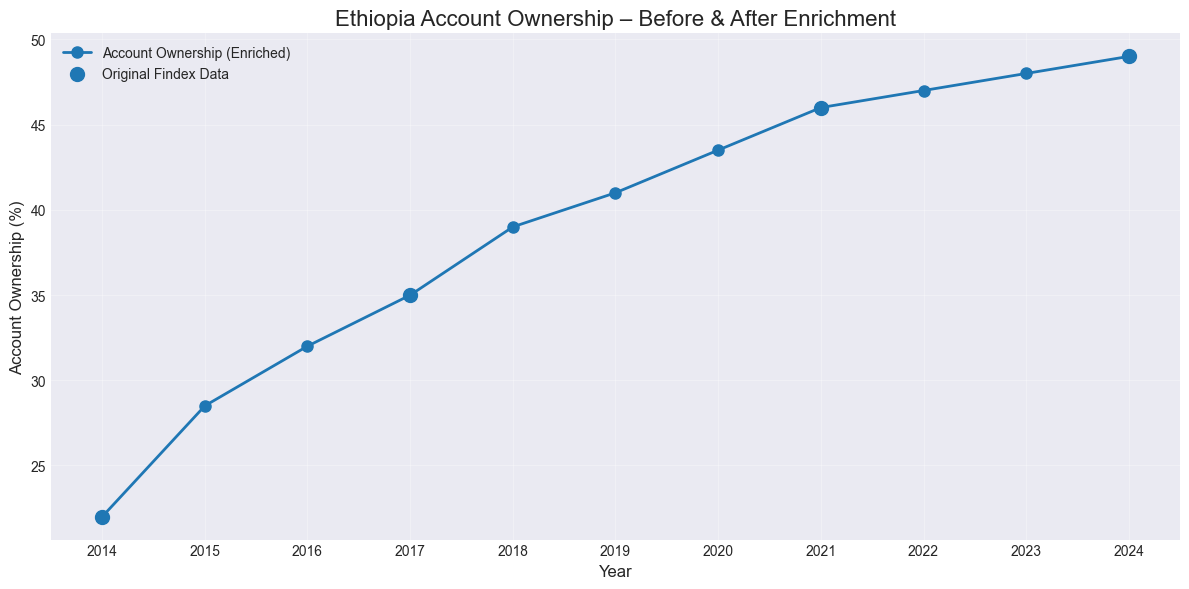

✓ Visualization saved to: d:\10acadamyWeek10 project\ethiopia-financial-inclusion-forecast\data\processed\enrichment_visualization.png


In [ ]:
# Create a simple plot showing the enriched account ownership trend


plt.figure(figsize=(12, 6))

# Filter for account ownership observations
acc_data = enriched_data['data'][
    (enriched_data['data']['indicator_code'] == 'ACC_OWNERSHIP') &
    (enriched_data['data']['record_type'] == 'observation')
].copy()

# Convert dates
acc_data['date'] = pd.to_datetime(acc_data['observation_date'])
acc_data['year'] = acc_data['date'].dt.year

# 🔑 FIX: aggregate to one value per year (mean is appropriate here)
acc_data_yearly = (
    acc_data
    .groupby('year', as_index=False)['value_numeric']
    .mean()
)

# Convert year back to datetime for plotting
acc_data_yearly['date'] = pd.to_datetime(acc_data_yearly['year'], format='%Y')

# Plot enriched trend
plt.plot(
    acc_data_yearly['date'],
    acc_data_yearly['value_numeric'],
    marker='o',
    linewidth=2,
    markersize=8,
    label='Account Ownership (Enriched)'
)

# Highlight original Findex survey years
original_years = [2011, 2014, 2017, 2021, 2024]
original_data = acc_data_yearly[acc_data_yearly['year'].isin(original_years)]

plt.scatter(
    original_data['date'],
    original_data['value_numeric'],
    s=100,
    zorder=5,
    label='Original Findex Data'
)

# Styling
plt.title('Ethiopia Account Ownership – Before & After Enrichment', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Account Ownership (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

# Save the plot
plot_path = Path.cwd().parent / "data" / "processed" / "enrichment_visualization.png"
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Visualization saved to: {plot_path}")
